**МЛ практика 5. Задача регрессии**

**Объяснить результаты метрик качества MAE, MSE, R2:**
1. У меня данных много и с большим разбросом. Возможно из-за этого результаты **MAE** и **MSE** большие.

Сами по себе суммы ошибок могут быть большими как я понял.

2. Процент стабильно меньше десяти.

Самое вероятное - мой косяк, но возможно данные очень разные или модель плохая.

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('/content/income.csv')

y = df['age'] # выбираем целевую переменную (количественная)
X = df.drop('age', axis=1) # переменные для проверки влияния


In [173]:
df.pop('native-country')

,native-country
0,United-States
1,United-States
2,United-States
3,United-States
4,Cuba
...,...
32556,United-States
32557,United-States
32558,United-States
32559,United-States


In [174]:
df.pop('sex')

,sex
0,Male
1,Male
2,Male
3,Male
4,Female
...,...
32556,Female
32557,Male
32558,Female
32559,Male


In [175]:
X

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [176]:
X.pop('native-country')

,native-country
0,United-States
1,United-States
2,United-States
3,United-States
4,Cuba
...,...
32556,United-States
32557,United-States
32558,United-States
32559,United-States


In [177]:
X.pop('sex')

,sex
0,Male
1,Male
2,Male
3,Male
4,Female
...,...
32556,Female
32557,Male
32558,Female
32559,Male


In [178]:
X

,workclass,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,income >50K
0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,0
1,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,0
2,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,0
3,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,0
4,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,0
32557,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,1
32558,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,0
32559,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,0


In [179]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,0


In [180]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)

In [181]:
X

,education-num,capital-gain,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,13,2174,0,40,0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,13,0,0,13,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,9,0,0,40,0,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
3,7,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,13,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,12,0,0,38,0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
32557,9,0,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
32558,9,0,0,40,0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
32559,9,0,0,20,0,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True


In [182]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,education-num,capital-gain,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,y
0,13,2174,0,40,0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,39
1,13,0,0,13,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,50
2,9,0,0,40,0,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,38
3,7,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,53
4,13,0,0,40,0,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,12,0,0,38,0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,27
32557,9,0,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,40
32558,9,0,0,40,0,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,58
32559,9,0,0,20,0,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,22


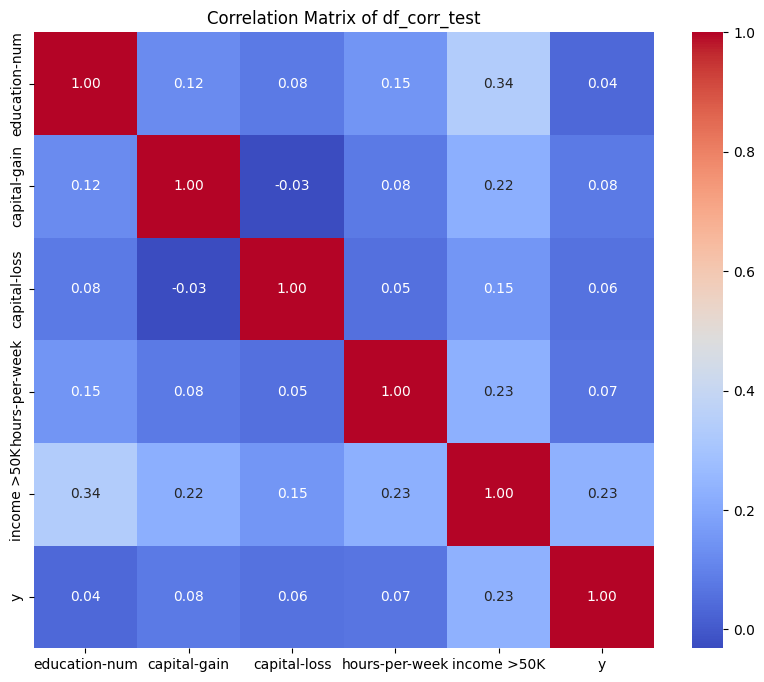

In [183]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()


In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [185]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать

Regularization: None
Mean Absolute Error (MAE): 8.22
Mean Squared Error (MSE): 109.52
R^2 Score: 0.41


In [186]:
resolve_regression(X[['capital-gain', 'education-num', 'capital-loss']], y)
None

Regularization: None
Mean Absolute Error (MAE): 11.14
Mean Squared Error (MSE): 184.10
R^2 Score: 0.01


In [187]:
X

,education-num,capital-gain,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,13,2174,0,40,0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,13,0,0,13,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,9,0,0,40,0,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
3,7,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,13,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,12,0,0,38,0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
32557,9,0,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
32558,9,0,0,40,0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
32559,9,0,0,20,0,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True


In [188]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   education-num                         32561 non-null  int64
 1   capital-gain                          32561 non-null  int64
 2   capital-loss                          32561 non-null  int64
 3   hours-per-week                        32561 non-null  int64
 4   income >50K                           32561 non-null  int64
 5   workclass_Local-gov                   32561 non-null  bool 
 6   workclass_Never-worked                32561 non-null  bool 
 7   workclass_Private                     32561 non-null  bool 
 8   workclass_Self-emp-inc                32561 non-null  bool 
 9   workclass_Self-emp-not-inc            32561 non-null  bool 
 10  workclass_State-gov                   32561 non-null  bool 
 11  workclass_Without-pay                 325

In [189]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


In [190]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [191]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [192]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 8.50
Mean Squared Error (MSE): 119.23
R^2 Score: 0.36


In [193]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 8.88
Mean Squared Error (MSE): 126.00
R^2 Score: 0.32


Regularization: None
Mean Absolute Error (MAE): 8.88
Mean Squared Error (MSE): 126.00
R^2 Score: 0.32


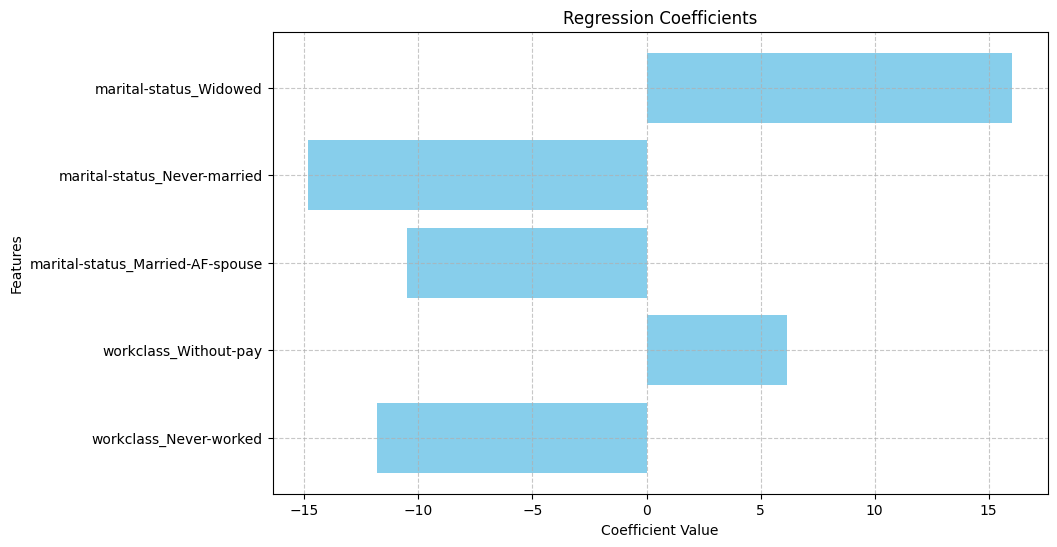

In [194]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

**Анализ графика коэфициекнтов линейной регрессии:**
marital_status: widowed и newer-married - имеет самый влиятельный вклад в модель.
**Метрики:**<br>
**Regularization:** None<br>
**Mean Absolute Error** (MAE): 8.88 - значения у меня в датафрейме не маленьки, так что наверное всё не так и плохо. Показывает насколько в среднем прогнозы модели отклоняются от реальных значений.<br>
**Mean Squared Error** (MSE): 126.00 - то же но в квадрате. Наказывает большие ошибки сильнее маленьких. Показывает насколько в среднем прогнозы модели отклоняются от реальных значений в квадрате<br>
**R^2 Score**: 0.32 - точность объяснения дисперсии, т.е. меры разброса значений целевой переменной, не такая и маленькая (32%).

In [195]:
# Выбираем числовые признаки
numeric_features = X_selected_corr.select_dtypes(include=['int64', 'float64']).columns.tolist()
# ВНИМАНИЕ: тут отбираются только float, если у вас не категориальные признаки имеют тип int - нужно исправить (например, в ручную указать нужные столбцы)
#'education-num', 'age'
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
# Создаем копию DataFrame, если необходимо
X_selected_corr = X_selected_corr.copy()

# Применяем нормализацию
X_selected_corr.loc[:, numeric_features] = scaler.fit_transform(X_selected_corr[numeric_features])

In [196]:
X_selected_rfe

,workclass_Never-worked,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Never-married,marital-status_Widowed
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
32556,False,False,False,False,False
32557,False,False,False,False,False
32558,False,False,False,False,True
32559,False,False,False,True,False


Regularization: None
Mean Absolute Error (MAE): 8.88
Mean Squared Error (MSE): 126.00
R^2 Score: 0.32


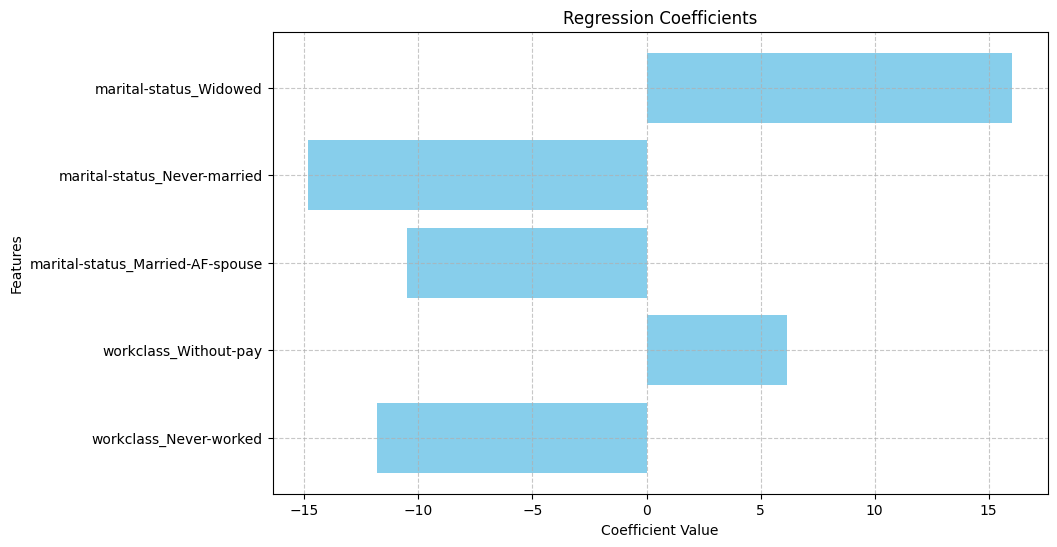

In [197]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

In [198]:

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 8.88
Mean Squared Error (MSE): 126.00
R^2 Score: 0.32


In [199]:
X

,education-num,capital-gain,capital-loss,hours-per-week,income >50K,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,13,2174,0,40,0,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,13,0,0,13,0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,9,0,0,40,0,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
3,7,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,13,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,12,0,0,38,0,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
32557,9,0,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
32558,9,0,0,40,0,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
32559,9,0,0,20,0,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True


Regularization: l1
Mean Absolute Error (MAE): 9.33
Mean Squared Error (MSE): 134.84
R^2 Score: 0.27


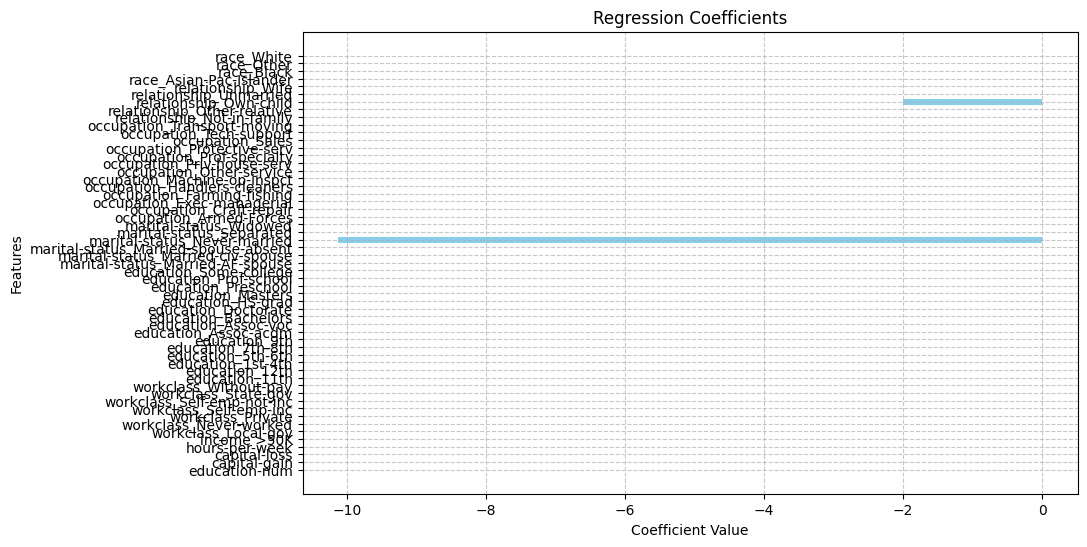

In [200]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: l2
Mean Absolute Error (MAE): 8.22
Mean Squared Error (MSE): 109.52
R^2 Score: 0.41


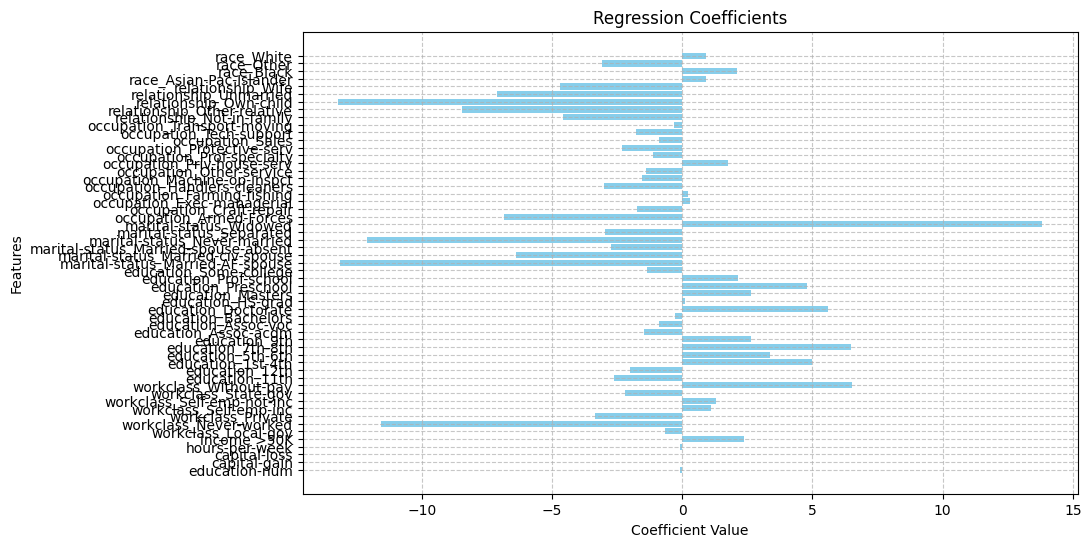

In [201]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 8.22
Mean Squared Error (MSE): 109.52
R^2 Score: 0.41


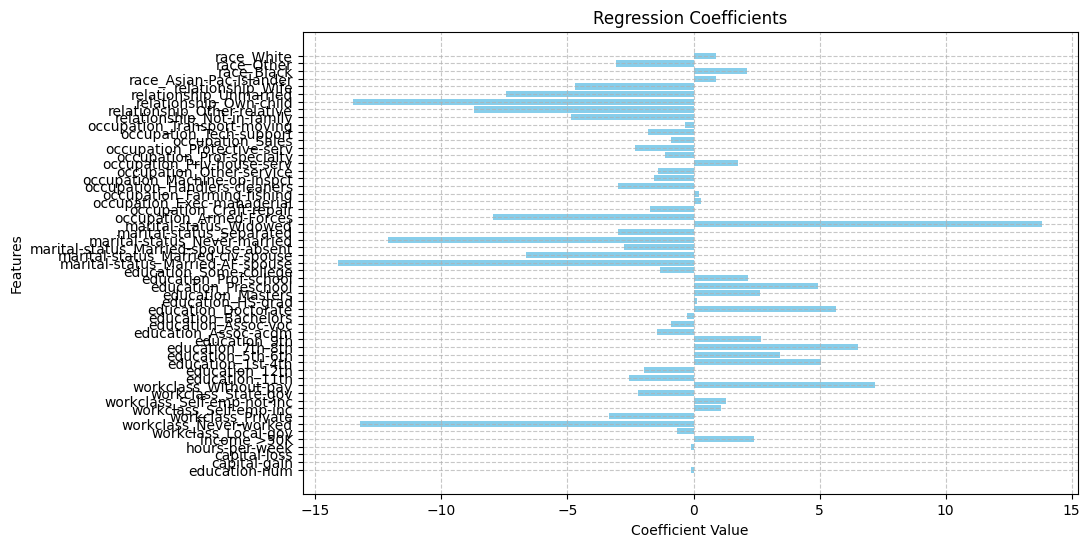

In [202]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)